In [1]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv("C://Users//yoona//Desktop//mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [2]:
print(df.shape)
df.info()

(8124, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-a

In [3]:
# 문자를 숫자로 변경하는 방법에는 LabelEncoder처럼 나오는 변수마다 0부터 숫자를 대입하여 변경하는 방법이 있다.

from sklearn.preprocessing import LabelEncoder             # 각 열마다 feature 알파벳을 숫자로 변환
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)                  # 들어온 feature의 이름이랑 class가 무엇인지 출력
    return le.transform(feat)                    # transform으로 숫자로 라벨링

for col in df.columns:
    df[str(col)] = label_encoded(df[str(col)])

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [4]:
# 각 열의 원소들이 숫자로 바뀐것을 확인할 수 있다.
for col in df.columns:
    print(df[str(col)])

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32
0       5
1       5
2       0
3       5
4       5
       ..
8119    3
8120    5
8121    2
8122    3
8123    5
Name: cap-shape, Length: 8124, dtype: int32
0       2
1       2
2       2
3       3
4       2
       ..
8119    2
8120    2
8121    2
8122    3
8123    2
Name: cap-surface, Length: 8124, dtype: int32
0       4
1       9
2       8
3       8
4       3
       ..
8119    4
8120    4
8121    4
8122    4
8123    4
Name: cap-color, Length: 8124, dtype: int32
0       1
1       1
2       1
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: bruises, Length: 8124, dtype: int32
0       6
1       0
2       3
3       6
4       5
       ..
8119    5
8120    5
8121    5
8122    8
8123    5
Name: odor, Length: 8124, dtype: int32
0       1
1       1
2       1
3       1
4       1
       ..
8119    0
8120    0
8121 

In [5]:
df    # 라벨이 숫자로 바뀐것을 확인할 수 있다.

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


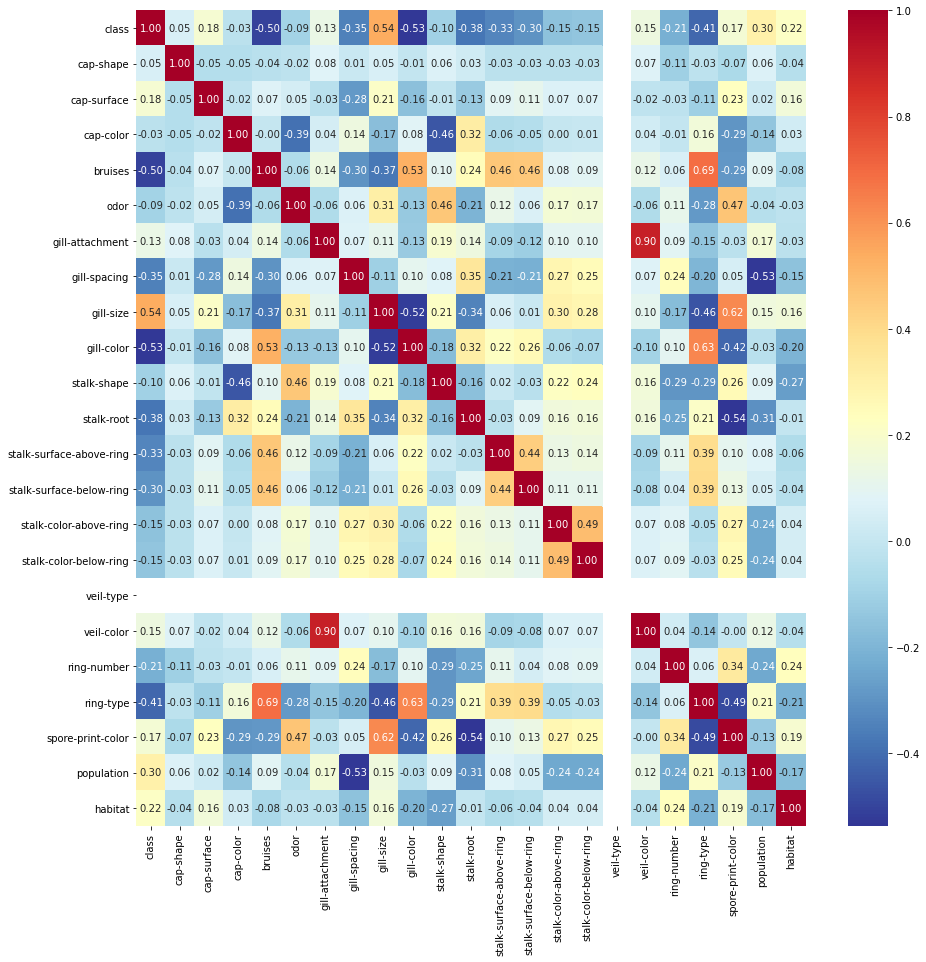

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,15))
ax = sns.heatmap(df.corr(), fmt=".2f", annot = True, cmap = 'RdYlBu_r')           # 열간의 상관관계 보기

<ipython-input-7-c7959fa31463>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=plt.gca())              # gca는 현재 좌표축 또는 차트를 반환


array([[<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'cap-shape'}>,
        <AxesSubplot:title={'center':'cap-surface'}>,
        <AxesSubplot:title={'center':'cap-color'}>,
        <AxesSubplot:title={'center':'bruises'}>],
       [<AxesSubplot:title={'center':'odor'}>,
        <AxesSubplot:title={'center':'gill-attachment'}>,
        <AxesSubplot:title={'center':'gill-spacing'}>,
        <AxesSubplot:title={'center':'gill-size'}>,
        <AxesSubplot:title={'center':'gill-color'}>],
       [<AxesSubplot:title={'center':'stalk-shape'}>,
        <AxesSubplot:title={'center':'stalk-root'}>,
        <AxesSubplot:title={'center':'stalk-surface-above-ring'}>,
        <AxesSubplot:title={'center':'stalk-surface-below-ring'}>,
        <AxesSubplot:title={'center':'stalk-color-above-ring'}>],
       [<AxesSubplot:title={'center':'stalk-color-below-ring'}>,
        <AxesSubplot:title={'center':'veil-type'}>,
        <AxesSubplot:title={'center':'veil-color'}>,


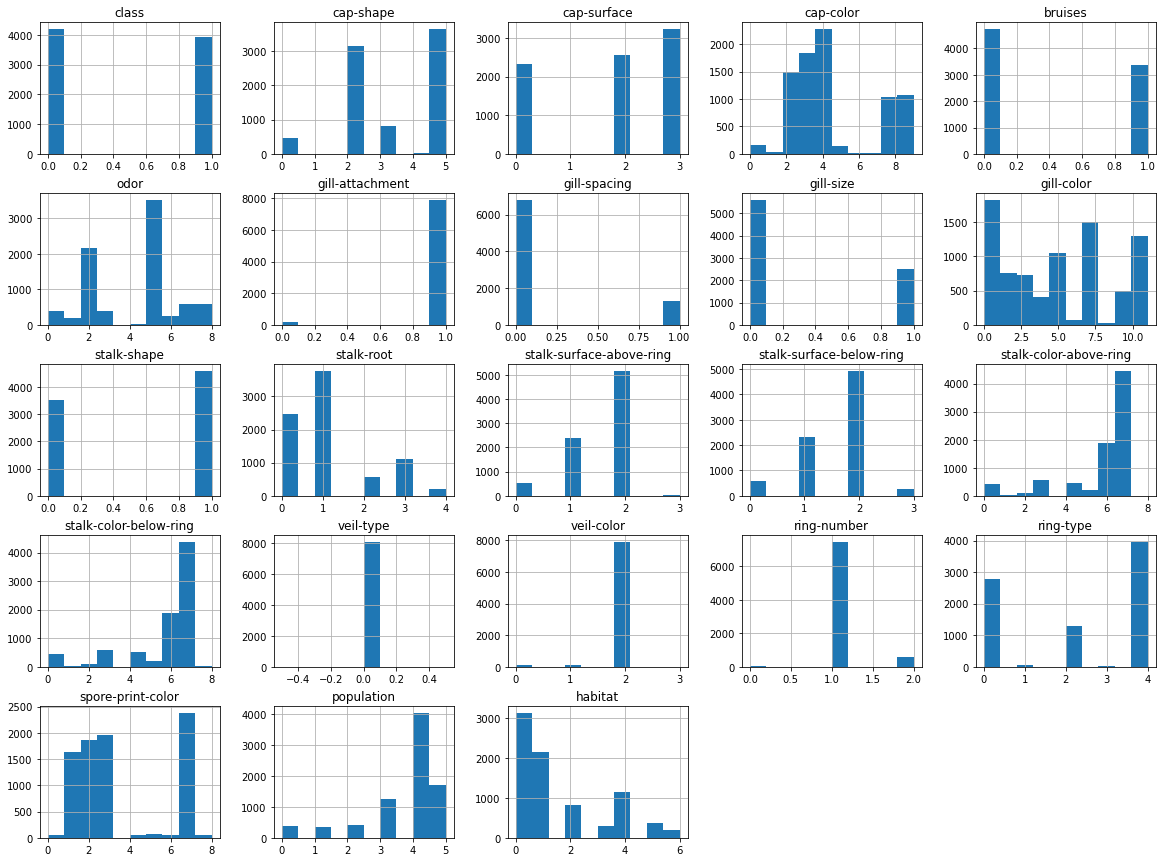

In [7]:
plt.figure(figsize = (20,15))
df.hist(ax=plt.gca())              # gca는 현재 좌표축 또는 차트를 반환
#plt.show()

In [8]:
# 히스토그램을 통해 본 의미없는 feature 열들은 삭제해준다.

X = df.drop(['class','veil-type','gill-attachment','ring-number','veil-color'],axis=1)    # axis = 1 열 삭제
y = df['class']

In [9]:
# stratify는 원래 데이터의 분포와 유사하게 데이터 추출
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X                             # feature 
                                                    , y                           # target
                                                    , stratify = y                # class별로 비율을 일정하게 나뉘어 들어가도록 조정
                                                    , random_state = 1)           # 난수고정

#print(X_train)
#print(y_train)
#print(X_test)
print(y_test)

#print(y_train.shape)
#print(y_test.shape)

5525    0
5868    1
5111    1
3193    1
1561    0
       ..
5822    1
2781    0
6980    1
4207    1
2914    0
Name: class, Length: 2031, dtype: int32


In [10]:
model = GradientBoostingClassifier(n_estimators=190, max_depth = 2, learning_rate = 0.2)   # 트리의 개수 기본은 10개
model.fit(X_train,y_train)     # 학습
prediction = model.predict(X_test)
print(prediction == y_test)            # 예측 결과와 실제 y_test 정답을 비교

#model.score(X_test,y_test)
model.score(X_train,y_train)

5525    True
5868    True
5111    True
3193    True
1561    True
        ... 
5822    True
2781    True
6980    True
4207    True
2914    True
Name: class, Length: 2031, dtype: bool


1.0

Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1052
           1       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



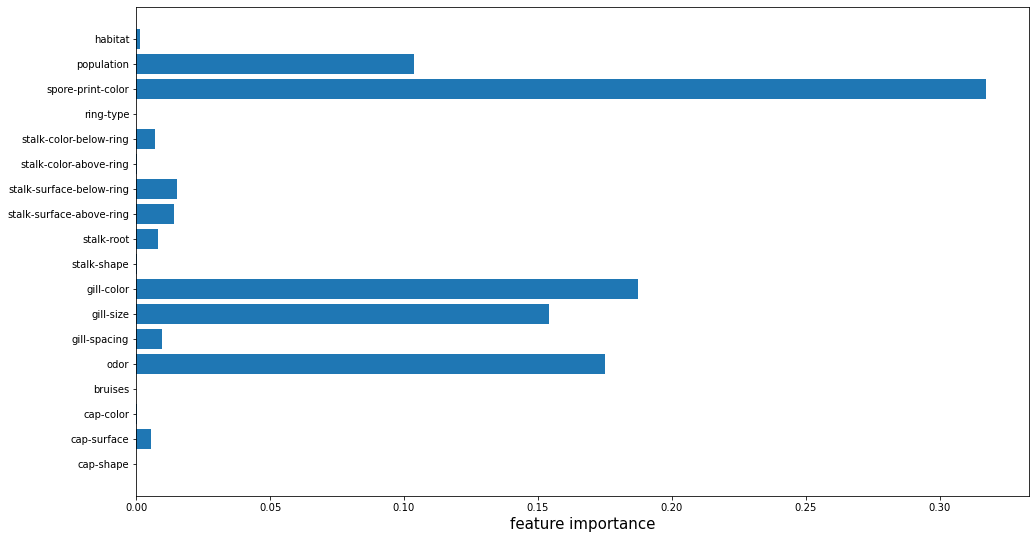

In [11]:
from sklearn.metrics import accuracy_score            # 그냥 정확도... score랑 동일
from sklearn.metrics import classification_report

print("Accuracy is: ", accuracy_score(prediction, y_test))
print(classification_report(prediction, y_test))                      # support는 실제 정답에 해당 클래스가 몇개인지 수 : 1 class가 압도적으로 많다

n_feature = 18                 # 피쳐 갯수
idx = np.arange(n_feature)

plt.figure(figsize=(16, 9))
plt.barh(idx, model.feature_importances_, align='center')
plt.yticks(idx, X.columns)
plt.xlabel('feature importance', size=15)
plt.show()

# 확실히 feature간 중요도를 보면 랜덤포레스트에서는 단일 트리보다 훨씬 많은 feature가 0이상의 중요도를 갖는다.
# 랜덤 포레스트의 무작위성은 단일 트리보다 더 넓은 시각에서 데이터를 바라볼 수 있다.

In [12]:
y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



Confusion matrix, without normalization
[[1052    0]
 [   0  979]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


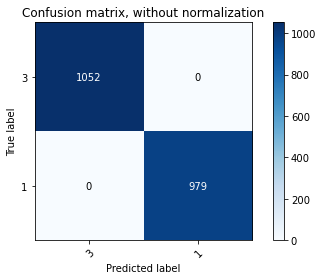

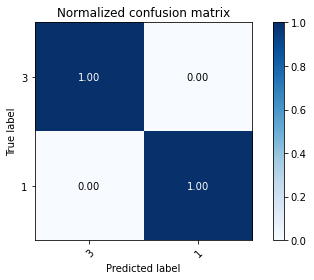

In [13]:
class_names = np.array(['1','2','3'], dtype='<U10')       # 최종 분류 모델이 1또는 2또는 3임
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
# Confusion Matrix 시각화
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)-1]        # 원래는 없던 건데 -1 해준다
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# 정규화 안한 confusion matrix
plot_confusion_matrix(y_test, prediction, classes=class_names, title='Confusion matrix, without normalization')

# 정규화 한 confusion matrix
plot_confusion_matrix(y_test, prediction, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()